<a href="https://colab.research.google.com/github/AhmedShokrySoliman/Intro-to-Weights-Biases/blob/main/Intro_to_Weights_%26_Biases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://i.imgur.com/gb6B4ig.png" width="400" alt="Weights & Biases" />

# 🏃‍♀️ Quickstart
Use Weights & Biases for machine learning experiment tracking, dataset versioning, and project collaboration.

<div><img /></div>

<img src="https://i.imgur.com/uEtWSEb.png" width="650" alt="Weights & Biases" />

<div><img /></div>



## 🔒 Data & Privacy

We take security very seriously, and our cloud-hosted dashboard uses industry standard best practices for encryption. If you're working with datasets that cannot leave your enterprise cluster, we have [on-prem](https://docs.wandb.com/self-hosted) installations available. 

It's also easy to download all your data and export it to other tools— like custom analysis in a Jupyter notebook. Here's more on our [API](https://docs.wandb.com/library/api).




Start by installing the library and logging in to your free account.

In [1]:
%%capture
!pip install wandb -qqq
import wandb

In [2]:
!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## 👟 Run your first W&B experiment
1️⃣. **Start a new run** and pass in hyperparameters to track

2️⃣. **Log metrics** from training or evaluation

3️⃣. **Visualize results** in the dashboard

In [3]:
import math
import random

# 1️⃣ Start a new run, tracking config metadata
wandb.init(project="test-drive", config={
    "learning_rate": 0.02,
    "dropout": 0.2,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
})
config = wandb.config

# Simulating a training or evaluation loop
for x in range(50):
    acc = math.log(1 + x + random.random() * config.learning_rate) + random.random()
    loss = 10 - math.log(1 + x + random.random() + config.learning_rate * x) + random.random()
    # 2️⃣ Log metrics from your script to W&B
    wandb.log({"acc":acc, "loss":loss})

wandb.finish()

wandb: Currently logged in as: ahmedshokry (use `wandb login --relogin` to force relogin)


acc,3.92042
loss,6.72645
_runtime,3
_timestamp,1619307905
_step,49


acc,▁▂▂▃▃▄▅▄▅▅▅▆▅▅▆▆▇▆▆▇▆▆▇▆▆▇▆▇▆█▆▇██▇▆▇▇█▇
loss,█▇▆▅▄▆▄▄▃▅▃▄▄▃▄▂▃▃▄▂▃▃▂▃▂▃▃▃▂▃▂▁▂▂▂▂▂▁▁▂
_runtime,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
_timestamp,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███


3️⃣ Here's an example of what an interactive dashboard looks like in W&B.
![](https://i.imgur.com/4I51OuT.png)

# 🧠 Example Model
Train a quick model in Keras and track results with W&B. Check our [examples repo](https://github.com/wandb/examples) for scripts and Colabs using Keras, PyTorch, TensorFlow, Scikit, XGBoost and more.

## 🥕 Simple Keras DNN
Run this model to train a simple MNIST classifier, and click on the project page link to see your results stream in live to a W&B project.

In [4]:
# Simple Keras Model

import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from wandb.keras import WandbCallback

# Set an experiment name to group training and evaluation
experiment_name = wandb.util.generate_id()

# Start a run, tracking hyperparameters
wandb.init(
    project="intro-demo",
    group=experiment_name,
    config={
        "layer_1": 512,
        "activation_1": "relu",
        "dropout": 0.2,
        "layer_2": 10,
        "activation_2": "softmax",
        "optimizer": "sgd",
        "loss": "sparse_categorical_crossentropy",
        "metric": "accuracy",
        "epoch": 6,
        "batch_size": 32
    })
config = wandb.config

# Get the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, y_train = x_train[::5], y_train[::5]  # Subset data for a faster demo

# Build a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(config.layer_1, activation=config.activation_1),
    tf.keras.layers.Dropout(config.dropout),
    tf.keras.layers.Dense(config.layer_2, activation=config.activation_2)
    ])

model.compile(optimizer=config.optimizer,
              loss=config.loss,
              metrics=[config.metric]
              )

history = model.fit(x=x_train,
                    y=y_train,
                    epochs=config.epoch,
                    batch_size=config.batch_size,
                    validation_data=(x_test, y_test),
                    # Use the WandbCallback to automatically save all the
                    # metrics tracked in model.fit() to your dashboard
                    callbacks=[WandbCallback()]
                    )

wandb.finish()

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/6
375/375 [==============================] - 5s 4ms/step - loss: 1.6707 - accuracy: 0.5283 - val_loss: 0.6935 - val_accuracy: 0.8513
Epoch 2/6
375/375 [==============================] - 1s 3ms/step - loss: 0.6540 - accuracy: 0.8426 - val_loss: 0.4854 - val_accuracy: 0.8775
Epoch 3/6
375/375 [==============================] - 1s 3ms/step - loss: 0.4902 - accuracy: 0.8687 - val_loss: 0.4105 - val_accuracy: 0.8924
Epoch 4/6
375/375 [==============================] - 1s 3ms/step - loss: 0.4152 - accuracy: 0.8867 - val_loss: 0.3724 - val_accuracy: 0.9016
Epoch 5/6
375/375 [==============================] - 1s 3ms/step - loss: 0.3802 - accuracy: 0.8951 - val_loss: 0.3460 - val_accuracy: 0.9067
Epoch 6/6
375/375 [==============================] - 1s 3ms/step - loss: 0.3507 - accuracy: 0.9018 - val_loss: 0.3268 - val_accuracy: 0.9132


epoch,5
loss,0.34904
accuracy,0.9015
val_loss,0.32685
val_accuracy,0.9132
_runtime,19
_timestamp,1619308030
_step,5
best_val_loss,0.32685
best_epoch,5


epoch,▁▂▄▅▇█
loss,█▃▂▁▁▁
accuracy,▁▆▇███
val_loss,█▄▃▂▁▁
val_accuracy,▁▄▆▇▇█
_runtime,▁▂▃▅▆█
_timestamp,▁▂▃▅▆█
_step,▁▂▄▅▇█


## 🧪 Log Analysis

Next, log an analysis run, using the same experiment name as the `group` parameter so that this run and the previous run are grouped together in W&B.

In [5]:
%%capture
# Install dependencies
!pip install scikit-plot -qqq

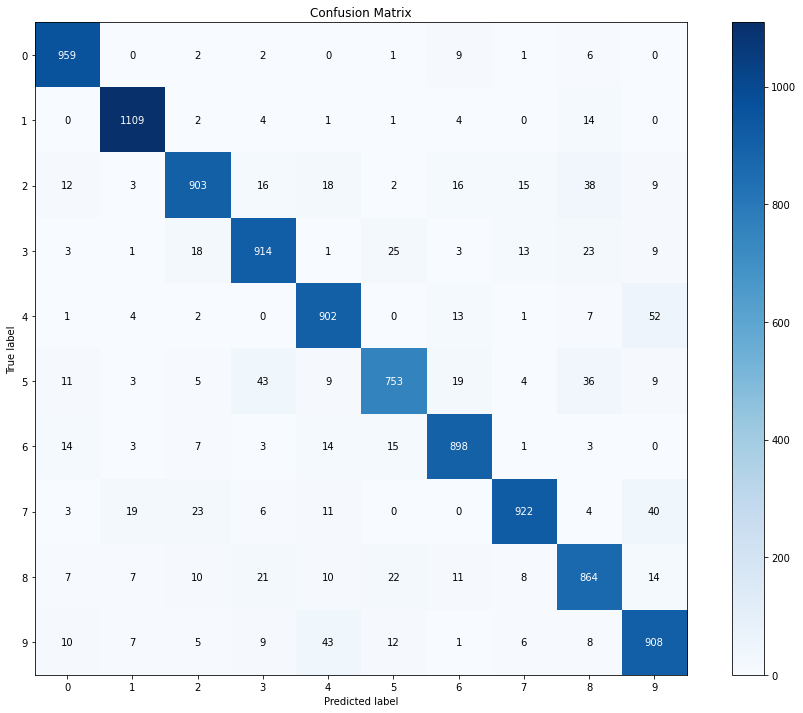

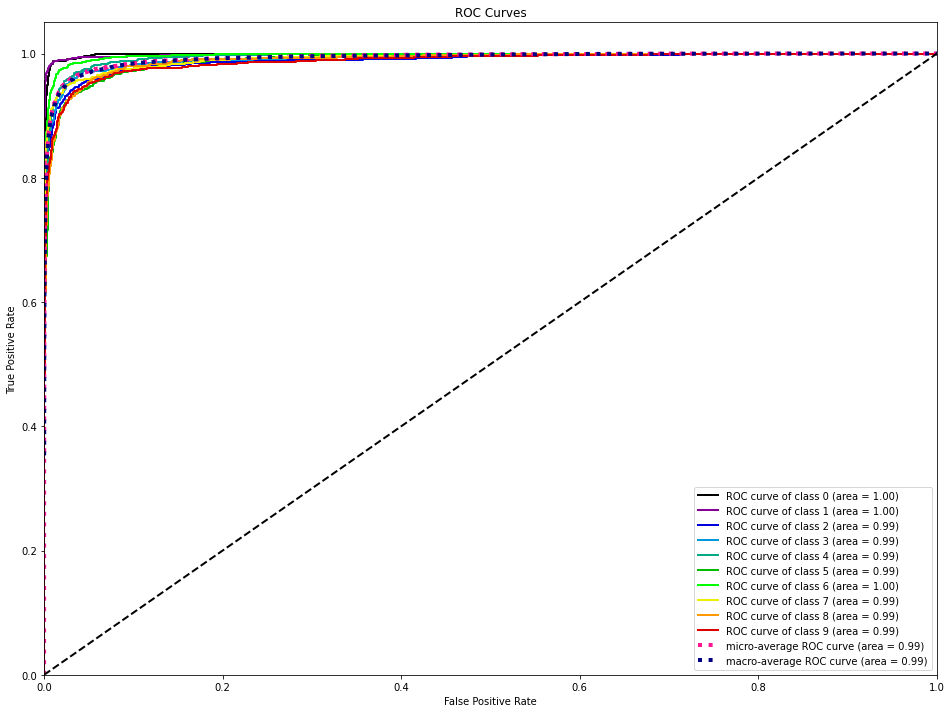

In [6]:
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_confusion_matrix, plot_roc

wandb.init(project="intro-demo", group=experiment_name)

# Log F1 Score
y_test_pred = np.asarray(model.predict(x_test))
y_test_pred_class = np.argmax(y_test_pred, axis=1)
f1 = f1_score(y_test, y_test_pred_class, average='micro')
wandb.log({"f1": f1},
          commit=False)  # Hold on, more incoming!

# Log Confusion Matrix
fig, ax = plt.subplots(figsize=(16, 12))
plot_confusion_matrix(y_test, y_test_pred_class, ax=ax)
wandb.log({"confusion_matrix": wandb.Image(fig)}, commit=False)

# Log ROC Curve
fig, ax = plt.subplots(figsize=(16, 12))
plot_roc(y_test, y_test_pred, ax=ax)
wandb.log({"plot_roc": wandb.Image(fig)},
          commit=True)  # Now we've logged everything for this step

class_score_data = []
for test, pred in zip(y_test, y_test_pred):
    class_score_data.append([test, pred])

wandb.log({"class_scores": wandb.Table(data=class_score_data,
                                           columns=["test", "pred"])})

In [7]:
print(y_test)
print(y_test_pred)

[7 2 1 ... 4 5 6]
[[2.4027344e-04 1.4372559e-05 1.8561368e-04 ... 9.9312454e-01
  2.2788913e-04 4.8416764e-03]
 [1.8913673e-02 2.0945999e-03 8.4457117e-01 ... 5.1084130e-06
  9.5090363e-03 2.1935870e-05]
 [5.8975467e-04 9.3778974e-01 2.1766897e-02 ... 4.6609254e-03
  1.2340969e-02 3.0265653e-03]
 ...
 [9.4114303e-06 6.4310858e-05 6.5176129e-05 ... 3.8942504e-03
  2.4287835e-02 1.0656619e-01]
 [1.4058929e-02 1.3767546e-02 3.7753743e-03 ... 1.5218140e-03
  3.5329783e-01 3.0278470e-03]
 [5.0343841e-04 1.3802324e-07 6.2858011e-04 ... 5.4734976e-08
  1.1315508e-05 5.6604717e-06]]


## 📊 Visualize Results

Click on the **project page** link above to see your live results.



## 🎨 Example Gallery

See examples of projects tracked and visualized with W&B in our [Gallery →](https://app.wandb.ai/gallery)

# 📏 Best Practices

1. **Projects**: Log multiple runs to a project to compare them. `wandb.init(project="project-name")`
2. **Groups**: For multiple processes or cross validation folds, log each process as a run and group them together. `wandb.init(group='experiment-1')`
3. **Tags**: Add tags to track your current baseline or production model.
4. **Notes**: Type notes in the table to track the changes between runs.
5. **Reports**: Take quick notes on progress to share with colleagues and make dashboards and snapshots of your ML projects.



### 🤓 Advanced Setup

1. [Environment variables](https://docs.wandb.com/library/environment-variables): Set API keys in environment variables so you can run training on a managed cluster.
2. [Offline mode](https://docs.wandb.com/library/technical-faq#can-i-run-wandb-offline): Use `dryrun` mode to train offline and sync results later.
3. [On-prem](https://docs.wandb.com/self-hosted): Install W&B in a private cloud or air-gapped servers in your own infrastructure. We have local installations for everyone from academics to enterprise teams.
4. [Sweeps](http://wandb.me/sweeps-colab): Set up hyperparameter search quickly with our lightweight tool for tuning.
5. [Artifacts](http://wandb.me/artifacts-colab): Track and version models and datasets in a streamlined way that automatically picks up your pipeline steps as you train models.